### Start Linear Regression


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


%matplotlib inline

Test for GPU running - Optional only

In [3]:
from matplotlib.style import available
import torch
import tensorflow as tf

print("Num GPUs availiable: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("GPU available:", torch.cuda.is_available())
print("GPU device name:", torch.cuda.get_device_name(0))  # Assuming you have one GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
p = torch.tensor([1,0])
p = p.to(device)

Num GPUs availiable:  0
GPU available: False


AssertionError: Torch not compiled with CUDA enabled

Import of the desired file to work with

In [9]:
file = r"C:\Users\agran\OneDrive - Holon Institute of Technology\2. Year 2\DataScience\Proj\My_Project\final_merged_file_with_encoder.csv"
# file = "mixed_data.csv"
data = pd.read_csv(file)
data.head()

,Annual Salary,Experience,Education,Position,Company Name,Rating,Is Remote,Company Old,Company Size,Founded,...,Industry_Information Technology Support Services,Industry_Insurance Carriers,Industry_Internet & Web Services,Industry_Investment & Asset Management,Industry_Machinery Manufacturing,Industry_Publishing,Industry_Shipping & Trucking,Industry_Software Development,Industry_Video Game Publishing,Industry_Wholesale
0,109200.0,0,1,-1,Kanini,-1.0,1,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,114400.0,8,1,-1,Cloud and Things Inc\r\n4.6,4.6,1,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,156000.0,-1,-1,-1,Match Made Tech,-1.0,0,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,112168.0,10,1,0,Amgen\r\n4.2,4.2,0,43,10000+ Employees,1980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,98320.0,4,1,-1,Synaty Tech\r\n5.0,5.0,0,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
data.describe()
#

,Annual Salary,Experience,Education,Position,Rating,Is Remote,Company Old,Founded,Career Opportunities,Comp & Benefits,...,Industry_Information Technology Support Services,Industry_Insurance Carriers,Industry_Internet & Web Services,Industry_Investment & Asset Management,Industry_Machinery Manufacturing,Industry_Publishing,Industry_Shipping & Trucking,Industry_Software Development,Industry_Video Game Publishing,Industry_Wholesale
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,...,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,88097.918681,1.719780,0.587912,-0.521978,2.360989,0.159341,9.131868,812.219780,2.067582,2.029670,...,0.137363,0.005495,0.021978,0.005495,0.016484,0.005495,0.005495,0.005495,0.010989,0.005495
std,25240.744264,3.138347,1.184834,0.819015,2.417058,0.367003,22.031474,985.315333,2.374983,2.342686,...,0.345179,0.074125,0.147016,0.074125,0.127677,0.074125,0.074125,0.074125,0.104539,0.074125
min,31200.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70860.750000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,85674.700000,0.000000,1.000000,-1.000000,3.600000,0.000000,-1.000000,-1.000000,3.300000,3.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,104573.000000,3.000000,1.000000,0.000000,4.275000,0.000000,17.000000,2004.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,160000.000000,11.000000,2.000000,1.000000,5.000000,1.000000,211.000000,2018.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.shape

(182, 141)

In [7]:
data.columns

Index(['Experience', 'Education', 'Is Remote', 'Company Old', 'Rating',
       'Career Opportunities', 'Comp & Benefits', 'Culture & Values',
       'Senior Management', 'Work Life Balance',
       ...
       'Industry_Information Technology Support Services',
       'Industry_Insurance Carriers', 'Industry_Internet & Web Services',
       'Industry_Investment & Asset Management',
       'Industry_Machinery Manufacturing', 'Industry_Publishing',
       'Industry_Shipping & Trucking', 'Industry_Software Development',
       'Industry_Video Game Publishing', 'Industry_Wholesale'],
      dtype='object', length=141)

Display plot of Correlation - !!Don't use it if you have a lot of columns!!

In [ ]:
sns.pairplot(data)

Display array of Correlation

In [11]:
data.corr()


C:\Users\agran\AppData\Local\Temp\ipykernel_50364\1115552625.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Annual Salary,Experience,Education,Position,Rating,Is Remote,Company Old,Founded,Career Opportunities,Comp & Benefits,...,Industry_Information Technology Support Services,Industry_Insurance Carriers,Industry_Internet & Web Services,Industry_Investment & Asset Management,Industry_Machinery Manufacturing,Industry_Publishing,Industry_Shipping & Trucking,Industry_Software Development,Industry_Video Game Publishing,Industry_Wholesale
Annual Salary,1.000000,0.128016,-0.046076,-0.002382,-0.103921,-0.036884,0.058034,-0.095906,-0.084454,-0.077488,...,0.052260,-0.018450,-0.085299,0.129315,-0.041649,0.026287,-0.032051,-0.097730,0.184627,-0.043107
Experience,0.128016,1.000000,0.591328,0.368372,-0.012447,0.005403,0.025388,-0.088354,-0.039251,-0.037864,...,-0.005072,0.030405,-0.070399,0.077904,-0.071138,-0.040844,-0.040844,0.077904,0.009438,-0.064594
Education,-0.046076,0.591328,1.000000,0.426161,0.011718,0.126427,-0.022458,-0.052258,0.044311,0.042248,...,0.058118,0.025923,-0.042871,0.025923,-0.100937,0.025923,0.025923,0.025923,-0.052448,-0.099891
Position,-0.002382,0.368372,0.426161,1.000000,-0.000575,0.002525,0.063848,-0.075926,0.034994,0.048429,...,-0.057662,0.138508,0.049918,0.047503,-0.075768,0.138508,-0.043502,-0.043502,0.067365,-0.043502
Rating,-0.103921,-0.012447,0.011718,-0.000575,1.000000,-0.033437,0.303474,0.553586,0.909284,0.904649,...,0.277960,0.056709,0.108151,0.047458,0.055804,0.056709,0.069044,0.065960,0.071675,-0.008048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Industry_Publishing,0.026287,-0.040844,0.025923,0.138508,0.056709,-0.032360,0.425823,0.081378,0.051230,0.056324,...,-0.029661,-0.005525,-0.011142,-0.005525,-0.009623,1.000000,-0.005525,-0.005525,-0.007835,-0.005525
Industry_Shipping & Trucking,-0.032051,-0.040844,0.025923,-0.043502,0.069044,0.170729,-0.003829,0.090985,0.073199,0.075414,...,-0.029661,-0.005525,-0.011142,-0.005525,-0.009623,-0.005525,1.000000,-0.005525,-0.007835,-0.005525
Industry_Software Development,-0.097730,0.077904,0.025923,-0.043502,0.065960,-0.032360,-0.013978,0.091212,0.088890,0.075414,...,-0.029661,-0.005525,-0.011142,-0.005525,-0.009623,-0.005525,-0.005525,1.000000,-0.007835,-0.005525
Industry_Video Game Publishing,0.184627,0.009438,-0.052448,0.067365,0.071675,-0.045891,0.095321,0.126776,0.063751,0.079876,...,-0.042063,-0.007835,-0.015802,-0.007835,-0.013646,-0.007835,-0.007835,-0.007835,1.000000,-0.007835


Display heatmap of Correlation

C:\Users\agran\AppData\Local\Temp\ipykernel_50364\2781003664.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot:>

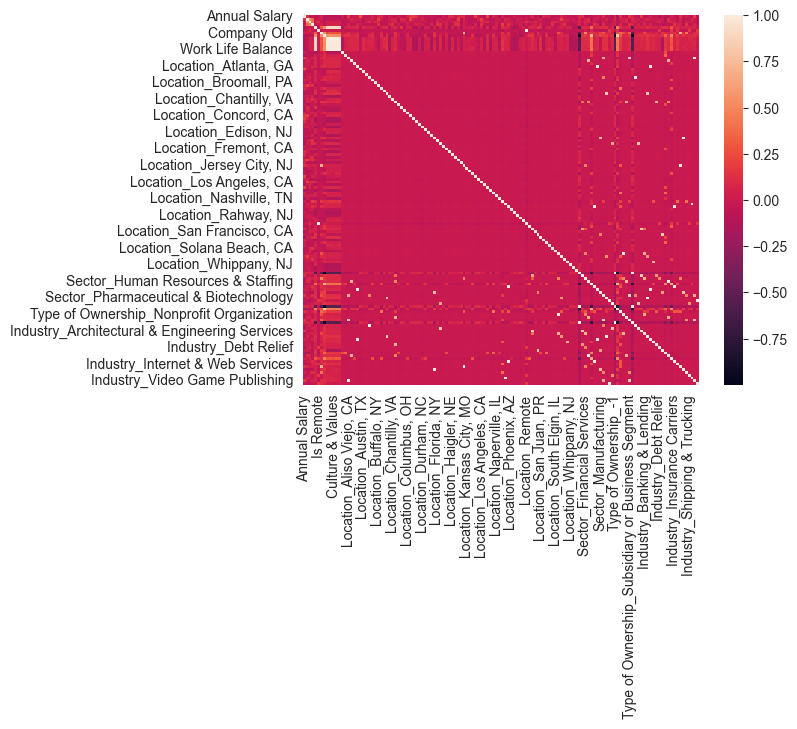

In [22]:
sns.heatmap(data.corr())

Create object of the LR

In [12]:
regressor = LinearRegression()

Create object of X data

In [13]:
X = data[[ 'Experience', 'Education',
          'Is Remote',
           'Company Old', 'Rating', 'Career Opportunities',
          'Comp & Benefits', 'Culture & Values', 'Senior Management',
          'Work Life Balance']]
X.head()
# 'Job Title',"Location",  'Sector', 'Type of Ownership', 'Revenue','Founded', , 'Industry','Company Size'

,Experience,Education,Is Remote,Company Old,Rating,Career Opportunities,Comp & Benefits,Culture & Values,Senior Management,Work Life Balance
0,0,1,1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,8,1,1,-1,4.6,4.3,4.0,4.8,4.8,4.5
2,-1,-1,0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,10,1,0,43,4.2,3.7,4.0,4.0,3.6,3.9
4,4,1,0,-1,5.0,5.0,5.0,5.0,5.0,5.0


Create object of Y data

In [14]:
y = data['Annual Salary']
y.head()

0    109200.0
1    114400.0
2    156000.0
3    112168.0
4     98320.0
Name: Annual Salary, dtype: float64

Split data to test and train

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [36]:
regressor.fit(X_train,y_train)

LinearRegression()

Display the coef, intercept and R2 (most important)

In [37]:
print(regressor.coef_)
print(regressor.intercept_)
print("R2: ",regressor.score(X_train,y_train))

[ 1642.80368358 -3904.04742629 -3167.48861599   124.18189218
 -2478.61766945 -2630.6388216   4677.92508562  2686.95299372
  3194.43893016 -6620.86147389]
89580.87817164762
R2:  0.07510903896985288


In [38]:
y_pred = regressor.predict(X_test)
y_pred

array([ 87094.80106233,  95993.98837255,  82937.52113351,  86723.44980863,
        92888.74097763,  92888.74097763,  88384.62641775,  85089.58974675,
        87262.40048427,  81829.16463287,  90284.4228097 ,  90547.13906673,
        85239.48088495,  86105.00974951,  83073.18980751,  74547.26375181,
        80495.65263037,  81294.71744993,  85863.93524492,  79688.63284856,
        92888.74097763, 103151.48664448,  93208.48396581,  79808.26760578,
        92888.74097763,  86841.56855981,  92888.74097763,  83240.49628929,
        89405.78745829,  84488.36320814,  76663.86989486,  76470.9537918 ,
        82379.74819004,  90805.09287472,  91932.96776477,  87865.93218427,
        86105.00974951])

Doesn't work

In [24]:
sns.regplot(y_test,y_pred)

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

In [25]:
mse = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse

139.17475789314037

In [26]:
regressor.coef_

array([ 1665.41075896, -2298.04274529,  -549.24149258,   125.43022223,
       -2346.28944045, -2740.79619042,   997.27791425,  5337.77162853,
        6059.09666832, -8632.23940852])